# Noisy-OR model

The noisy-OR model \[1\] represents a joint probability distribution composed of an effect variable $E$ that has $K$ parents $C_k, k=1,...,K$. Each parent (cause) contributes to the effect being present with probability $p_k$ independently of the other causes.

For simplicity, we will assume that all of them are binary. In the presence of a "leackage term" $L$, defined by a (very) small probability $p_0$ by which the effect is present due to a non-modeled cause, it factorizes as:

$$
\begin{align}
 P(E=0|C_1,...,C_K,L=1) & = P(E=0|L=1)\prod_{k=1}^{K} P(E=0|C_k)\\
 & = (1-p_0)\prod_{k=1}^{K} (1-p_k)^{C_k},
\end{align}
$$

Note that when the parent is not active ($C_k=0$), the corresponding term is $1$, so the probability is not affected by $p_k$. On the contrary, when $C_k=1$, the higher the value of $p_k$, the less likely will be that $E=0$, and vice-versa.

## Latent variable representation + deterministic OR

The noisy-OR model can be equivalently represented using latent variables followed by a deterministic OR function.

For each cause $C_k$, $k = 1, \dots, K$, we introduce a latent binary variable $I_k \in \{0,1\}$ indicating whether cause $C_k$ actually triggers the effect. The conditional distribution of each latent variable is defined as
$$
P(I_k = 1 \mid C_k = 1) = p_k,
\qquad
P(I_k = 1 \mid C_k = 0) = 0.
$$
Equivalently,
$$
P(I_k = 0 \mid C_k) = (1 - p_k)^{C_k}.
$$

To model unobserved causes, we include a leakage variable $I_0$, independent of the parents, with
$$
P(I_0 = 1) = p_0.
$$

The effect variable $E$ is then defined deterministically as the logical OR of all latent variables:
$$
P(E \mid I_0, I_1, \dots, I_K)
=
\mathbf{1}\!\left[
E = \operatorname{OR}(I_0, I_1, \dots, I_K)
\right],
$$
where
$$
\operatorname{OR}(I_0, I_1, \dots, I_K)
=
\max_{k=0,\dots,K} I_k.
$$

Marginalizing out the latent variables gives
$$
P(E = 0 \mid C_1, \dots, C_K)
=
\sum_{I_0,\dots,I_K}
P(E = 0 \mid I_0,\dots,I_K)
\prod_{k=1}^K P(I_k \mid C_k)\,P(I_0).
$$

Since the OR is deterministic, the condition $E = 0$ holds if and only if
$$
I_0 = I_1 = \cdots = I_K = 0.
$$
All other configurations of the latent variables have zero probability in the sum. Therefore, the marginalization collapses to a single term:
$$
P(E = 0 \mid C_1, \dots, C_K)
=
P(I_0 = 0)\prod_{k=1}^K P(I_k = 0 \mid C_k)
=
(1 - p_0)\prod_{k=1}^K (1 - p_k)^{C_k}.
$$


## Using exponentially large OR tables

All latent variables $I_k$ are then combined through a **deterministic OR relation** defining the effect variable $E$:
$$
P(E \mid I_0, I_1, \dots, I_K)
=
\mathbf{1}\!\left[
E = \operatorname{OR}(I_0, I_1, \dots, I_K)
\right].
$$

The size of this conditional probability table grows exponentially with the number of inputs. For example, when $K = 3$, the OR relation involves four inputs ($I_0, I_1, I_2, I_3$) and requires a table with $2^{4} = 16$ entries. The full table for the case $E = 0$ is shown below:
<table>
    <tr><th>$I_0$</th><th>$I_1$</th><th>$I_2$</th><th>$I_3$</th><th>$P(E=0 \mid I_0,I_1,I_2,I_3)$</th></tr>
    <tr><td>0</td><td>0</td><td>0</td><td>0</td><td>$1$</td></tr>
    <tr><td> 0 </td> <td> 0 </td> <td> 0 </td> <td> 1 </td> <td> $0$ </td></tr>
    <tr><td> 0 </td> <td> 0 </td> <td> 1 </td> <td> 0 </td> <td> $0$ </td></tr>
    <tr><td> 0 </td> <td> 0 </td> <td> 1 </td> <td> 1 </td> <td> $0$ </td></tr>
    <tr><td> 0 </td> <td> 1 </td> <td> 0 </td> <td> 0 </td> <td> $0$ </td></tr>
    <tr><td> 0 </td> <td> 1 </td> <td> 0 </td> <td> 1 </td> <td> $0$ </td></tr>
    <tr><td> 0 </td> <td> 1 </td> <td> 1 </td> <td> 0 </td> <td> $0$ </td></tr>
    <tr><td> 0 </td> <td> 1 </td> <td> 1 </td> <td> 1 </td> <td> $0$ </td></tr>
    <tr><td> 1 </td> <td> 0 </td> <td> 0 </td> <td> 0 </td> <td> $0$ </td></tr>
    <tr><td> 1 </td> <td> 0 </td> <td> 0 </td> <td> 1 </td> <td> $0$ </td></tr>
    <tr><td> 1 </td> <td> 0 </td> <td> 1 </td> <td> 0 </td> <td> $0$ </td></tr>
    <tr><td> 1 </td> <td> 0 </td> <td> 1 </td> <td> 1 </td> <td> $0$ </td></tr>
    <tr><td> 1 </td> <td> 1 </td> <td> 0 </td> <td> 0 </td> <td> $0$ </td></tr>
    <tr><td> 1 </td> <td> 1 </td> <td> 0 </td> <td> 1 </td> <td> $0$ </td></tr>
    <tr><td> 1 </td> <td> 1 </td> <td> 1 </td> <td> 0 </td> <td> $0$ </td></tr>
    <tr><td> 1 </td> <td> 1 </td> <td> 1 </td> <td> 1 </td> <td> $0$ </td></tr>
</table>

This representation makes clear that, while the local factors $P(I_k \mid C_k)$ are simple and compact, the deterministic OR table $P(E \mid I_0,\dots,I_K)$ becomes exponentially large in $K$. This motivates the use of specialized noisy-OR parameterizations that avoid explicitly constructing this table.

Finally, to fully specify the model, prior probabilities for the causes $P(C_k)$ must be defined. For simplicity, these are often assumed to be uniform, although this assumption is independent of the noisy-OR structure itself.




*  **Exercise**: Create a model like that and experiment with different values of $p$. For example, assume $p=10^{-3},p_1=0.9,p_2=0.5,p_3=0.99$. The corresponding graphical model is <br>
 <!-- <img src="https://raw.githubusercontent.com/guillermoim/resources/main/noisyor.png" width=350 height=230>
<img src="https://github.com/aig-upf/public-ml-course-undergrads/blob/20f1068f6670311836dcdab49c0c1270922076a0/noisyor.png" width=350 height=230>

Noisy Or graph-1.png
-->

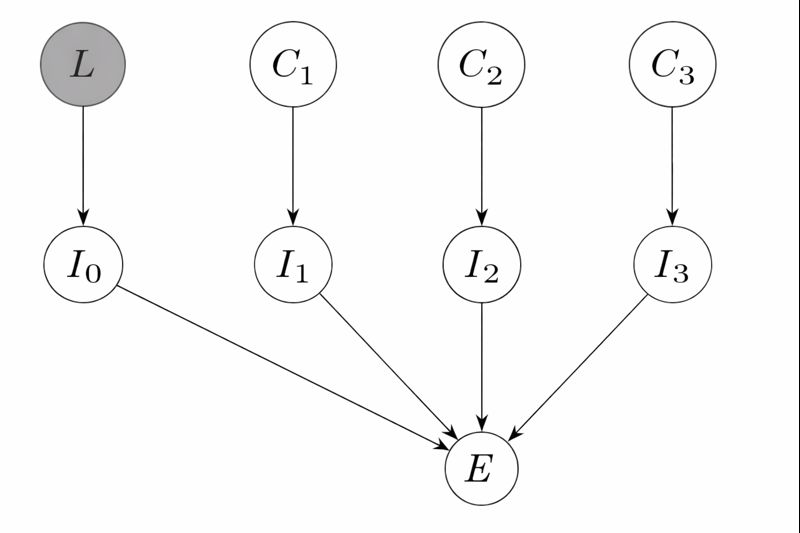

Construct this model using python.


In [ ]:
from pgmpy.factors.discrete import DiscreteFactor
import numpy as np

p = dict()

n_vars = 3
pr = [10**(-3), 0.9, 0.5, 0.99]

def noisy_factor(I, C, _p):
    """
    Given binary variables C and I, returns p(I|C) according to _p.
    """
    return DiscreteFactor(variables=[C, I],
                          cardinality=[2, 2],
                          values=[1, 0, (1-_p), _p])

# Construct p(I_k|C_k)
p["I0|L"] = noisy_factor("I0", "L", pr[0])
p["I1|C1"] = noisy_factor("I1", "C1", pr[1])
p["I2|C2"] = noisy_factor("I2", "C2", pr[2])
p["I3|C3"] = noisy_factor("I3", "C3", pr[3])

# Deterministic OR, p(E|I0,I1,I2,I3)
p["E|I0,I1,I2,I3"] = DiscreteFactor(variables=["E", "I0", "I1", "I2", "I3"],
                                    cardinality=[2, 2, 2, 2, 2],
                                    values=[1,0,0,0,0,0,0,0,
                                            0,0,0,0,0,0,0,0,
                                            0,1,1,1,1,1,1,1,
                                            1,1,1,1,1,1,1,1])

def prior(C, p0):
    """
    Given binary variable C, returns p(C)
    """
    return DiscreteFactor(variables=[C],
                          cardinality=[2],
                          values=[p0, 1-p0])


# Assume uniform priors for p(C_k)
p["C1"] = prior("C1", 0.5)
p["C2"] = prior("C2", 0.5)
p["C3"] = prior("C3", 0.5)

# Assume p(L=1)=1
p["L"] = prior("L", 0)

# Compute joint probability
p["E,C1,C2,C3,L,I0,I1,I2,I3"] = p["E|I0,I1,I2,I3"]*p["I0|L"]*p["I1|C1"]*p["I2|C2"]*p["I3|C3"]*p["C1"]*p["C2"]*p["C3"]*p["L"]
print("Sum of joint prob:", np.sum(p["E,C1,C2,C3,L,I0,I1,I2,I3"].values))

# Print p(E|C1,C2,C3)
p["E,C1,C2,C3"] = p["E,C1,C2,C3,L,I0,I1,I2,I3"].marginalize(["L", "I0", "I1", "I2", "I3"], inplace=False)
p["E|C1,C2,C3"] = p["E,C1,C2,C3"] / p["E,C1,C2,C3"].marginalize(["E"], inplace=False)
print(p["E|C1,C2,C3"])



Sum of joint prob: 1.0
+-------+-------+------+-------+-------------------+
| C2    | C3    | E    | C1    |   phi(C2,C3,E,C1) |
+=======+=======+======+=======+===================+
| C2(0) | C3(0) | E(0) | C1(0) |            0.9990 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(0) | E(0) | C1(1) |            0.0999 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(0) | E(1) | C1(0) |            0.0010 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(0) | E(1) | C1(1) |            0.9001 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(1) | E(0) | C1(0) |            0.0100 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(1) | E(0) | C1(1) |            0.0010 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(1) | E(1) | C1(0) |            0.9900 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(1) | E(1) | C1(1) |            0.9990 |
+-------+-------+------

Answer the following questions:


1. What is $P_1=P(E=1|C_1=0,C_2=0,C_3=1)$?

**Solution:**
If only parent $C_3$ is ON, we have $P_1=0.9900001$, which is $p_3$.

In [ ]:
# SOLUTION

print(p["E|C1,C2,C3"].reduce([("E",1), ("C1",0), ("C2",0), ("C3",1)], inplace=False))

+---------+
|   phi() |
+=========+
|  0.9900 |
+---------+


2. Argue why $P_2=P(E=1|C_1=0,C_2=1,C_3=0)$ is smaller than $P_1$.

**Solution:**
If only parent $C_2$ is ON, we have $P_2=0.500005$. The intuition is right, since $C_2$ has a lower probability of activating $E$: $p_2<p_3$

In [ ]:
# SOLUTION

print(p["E|C1,C2,C3"].reduce([("E",1), ("C1",0), ("C2",1), ("C3",0)], inplace=False))

+---------+
|   phi() |
+=========+
|  0.5005 |
+---------+


3. Relate $P_3=P(E=1|C_1=0,C_2=1,C_3=1)$ with $P_2$ and $P_1$.

**Solution:**
If both $C_2$ and $C_3$ parents are active, then $P_3=0.99500005$, i.e., the probability is higher that $P_1$ and $P_2$ individually, because both parents contribute to the activation of $E$, so the intuition is right again.

In [ ]:
# SOLUTION

print(p["E|C1,C2,C3"].reduce([("E",1), ("C1",0), ("C2",1), ("C3",1)], inplace=False))

+---------+
|   phi() |
+=========+
|  0.9950 |
+---------+


4. Relate $P_4=P(E=1|C_1=0,C_2=0,C_3=0)$ with all the previous probabilities.

**Solution:**
If no parents are active, then $P_4=10^{-3}$, a very small (but nonzero) leackage probability that $E$ is active.

In [ ]:
# SOLUTION

print(p["E|C1,C2,C3"].reduce([("E",1), ("C1",0), ("C2",0), ("C3",0)], inplace=False))

+---------+
|   phi() |
+=========+
|  0.0010 |
+---------+


5. What are the posterior probabilities of each individual parent, if we observe that $E=1$? How do they change if we observe that $E=0$?

In [ ]:
# SOLUTION

# Assume uniform prior
p["C1"] = DiscreteFactor(variables=["C1"], cardinality=[2], values=[0.5, 0.5])
p["C2"] = DiscreteFactor(variables=["C2"], cardinality=[2], values=[0.5, 0.5])
p["C3"] = DiscreteFactor(variables=["C3"], cardinality=[2], values=[0.5, 0.5])

p["E,C1,C2,C3"] = p["C1"]*p["C2"]*p["C3"]*p["E|C1,C2,C3"]
print("Sum of values of p(E,C1,C2,C3):", np.sum(p["E,C1,C2,C3"].values)) # Make sure it is a probability distribution
print(p["E,C1,C2,C3"])

p["E"] =  p["E,C1,C2,C3"].marginalize(["C1", "C2", "C3"], inplace=False)
p["C1|E"] = p["E,C1,C2,C3"].marginalize(["C2", "C3"], inplace=False) / p["E"]
p["C2|E"] = p["E,C1,C2,C3"].marginalize(["C1", "C3"], inplace=False) / p["E"]
p["C3|E"] = p["E,C1,C2,C3"].marginalize(["C1", "C2"], inplace=False) / p["E"]

print("\np(C1|E)\n", p["C1|E"])
print("\np(C2|E)\n", p["C2|E"])
print("\np(C3|E)\n", p["C3|E"])

Sum of values of p(E,C1,C2,C3): 1.0
+-------+-------+------+-------+-------------------+
| C1    | C3    | E    | C2    |   phi(C1,C3,E,C2) |
+=======+=======+======+=======+===================+
| C1(0) | C3(0) | E(0) | C2(0) |            0.1249 |
+-------+-------+------+-------+-------------------+
| C1(0) | C3(0) | E(0) | C2(1) |            0.0624 |
+-------+-------+------+-------+-------------------+
| C1(0) | C3(0) | E(1) | C2(0) |            0.0001 |
+-------+-------+------+-------+-------------------+
| C1(0) | C3(0) | E(1) | C2(1) |            0.0626 |
+-------+-------+------+-------+-------------------+
| C1(0) | C3(1) | E(0) | C2(0) |            0.0012 |
+-------+-------+------+-------+-------------------+
| C1(0) | C3(1) | E(0) | C2(1) |            0.0006 |
+-------+-------+------+-------+-------------------+
| C1(0) | C3(1) | E(1) | C2(0) |            0.1238 |
+-------+-------+------+-------+-------------------+
| C1(0) | C3(1) | E(1) | C2(1) |            0.1244 |
+-------+-

## Efficient representation

The previous networks contains a factor with exponential size, which renders it unfeasible for large $K$.

We can see that an OR between many variables can factorize as a product of tables involving only three variables

$$
 \text{OR}(y|x_1,x_2,x_3) = \sum_{s\in\{0,1\}} \text{OR}(y|x_3,s)\text{OR}(s|x_1,x_2).
$$

Based on these factorization, can you think of a more efficient way to represent the noisy-OR model?

Answer the following questions:

1. Using the efficient representation, compute the probabilities of the previous subsection and check they are equivalent

In [ ]:
# SOLUTION

p_eff = dict()
def deterministicOR(y, x1, x2):
  """
  Given binary variables y, x1 and x2, returns p(y|x1,x2) according to the deterministic OR model.
  """
  return DiscreteFactor(variables=[y, x1, x2],
                        cardinality=[2, 2, 2],
                        values=[1, 0, 0, 0, 0, 1, 1, 1])

# Construct p(I_k|C_k), same as before
p_eff["I0|L"] = noisy_factor("I0", "L", pr[0])
p_eff["I1|C1"] = noisy_factor("I1", "C1", pr[1])
p_eff["I2|C2"] = noisy_factor("I2", "C2", pr[2])
p_eff["I3|C3"] = noisy_factor("I3", "C3", pr[3])

# Define intermediate factors using deterministicOR
p_eff["S1|I1,I2"] = deterministicOR("S1", "I1", "I2")
p_eff["S2|S1,I3"] = deterministicOR("S2", "S1", "I3")
p_eff["E|S2,I0"] = deterministicOR("E", "S2", "I0")

# Define priors, same as before
p_eff["C1"] = p["C1"]
p_eff["C2"] = p["C2"]
p_eff["C3"] = p["C3"]
p_eff["L"] = p["L"]

# Compute joint probability
p_eff["E,C1,C2,C3,S1,S2,L,I0,I1,I2,I3"] = \
  p_eff["E|S2,I0"]*p_eff["I0|L"]*p_eff["S2|S1,I3"]*p_eff["S1|I1,I2"]*\
  p_eff["I1|C1"]*p_eff["I2|C2"]*p_eff["I3|C3"]*\
  p_eff["C1"]*p_eff["C2"]*p_eff["C3"]*p_eff["L"]

print("Sum of joint prob:", \
      np.sum(p_eff["E,C1,C2,C3,S1,S2,L,I0,I1,I2,I3"].values))


# Print p(E|C1,C2,C3)
p_eff["E,C1,C2,C3"] = p_eff["E,C1,C2,C3,S1,S2,L,I0,I1,I2,I3"].marginalize(["S1", "S2", "L","I0", "I1", "I2", "I3"], inplace=False)
p_eff["E|C1,C2,C3"] = p_eff["E,C1,C2,C3"] / p_eff["E,C1,C2,C3"].marginalize(["E"], inplace=False)
print(p_eff["E|C1,C2,C3"])

Sum of joint prob: 1.0
+-------+-------+------+-------+-------------------+
| C2    | C3    | E    | C1    |   phi(C2,C3,E,C1) |
+=======+=======+======+=======+===================+
| C2(0) | C3(0) | E(0) | C1(0) |            0.9990 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(0) | E(0) | C1(1) |            0.0999 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(0) | E(1) | C1(0) |            0.0010 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(0) | E(1) | C1(1) |            0.9001 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(1) | E(0) | C1(0) |            0.0100 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(1) | E(0) | C1(1) |            0.0010 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(1) | E(1) | C1(0) |            0.9900 |
+-------+-------+------+-------+-------------------+
| C2(0) | C3(1) | E(1) | C1(1) |            0.9990 |
+-------+-------+------

2. Construct a noisy-OR model with $K=6$ and $\boldsymbol{p} = (10^{-4}, 0.99, 0.9, 0.8, 0.7, 0.6, 0.5)$. Again, assume uniform priors for $C_k$ and $P(L=1)=1$.
    - For $\mathbf{x}=(0,0,0,0,0,1)$, what is the probability $p(E|\mathbf{C})$?
    - Let $\mathbf{x}=(1,0,0,0,0,1)$ What is the probability $p(E|\mathbf{C})$?

In [ ]:
p_K6 = dict()
pr_K6 = [10**(-4), 0.99, 0.9, 0.8, 0.7, 0.6, 0.5]

# Construct p(I_k|C_k)
p_K6["I0|L"] = noisy_factor("I0", "L", pr_K6[0])
p_K6["I1|C1"] = noisy_factor("I1", "C1", pr_K6[1])
p_K6["I2|C2"] = noisy_factor("I2", "C2", pr_K6[2])
p_K6["I3|C3"] = noisy_factor("I3", "C3", pr_K6[3])
p_K6["I4|C4"] = noisy_factor("I4", "C4", pr_K6[4])
p_K6["I5|C5"] = noisy_factor("I5", "C5", pr_K6[5])
p_K6["I6|C6"] = noisy_factor("I6", "C6", pr_K6[6])

# Define intermediate factors
p_K6["S1|I1,I2"] = deterministicOR("S1", "I1", "I2")
p_K6["S2|S1,I3"] = deterministicOR("S2", "S1", "I3")
p_K6["S3|S2,I4"] = deterministicOR("S3", "S2", "I4")
p_K6["S4|S3,I5"] = deterministicOR("S4", "S3", "I5")
p_K6["S5|S4,I6"] = deterministicOR("S5", "S4", "I6")
p_K6["E|S5,I0"] = deterministicOR("E", "S5", "I0")

# Same priors as before
p_K6["L"] = prior("L", 0)
p_K6["C1"] = prior("C1", 0.5)
p_K6["C2"] = prior("C2", 0.5)
p_K6["C3"] = prior("C3", 0.5)
p_K6["C4"] = prior("C4", 0.5)
p_K6["C5"] = prior("C5", 0.5)
p_K6["C6"] = prior("C6", 0.5)

p_K6["joint"] = p_K6["E|S5,I0"]*p_K6["S5|S4,I6"]*p_K6["S4|S3,I5"]*p_K6["S3|S2,I4"]*p_K6["S2|S1,I3"]*p_K6["S1|I1,I2"]\
                *p_K6["I0|L"]*p_K6["I1|C1"]*p_K6["I2|C2"]*p_K6["I3|C3"]*p_K6["I4|C4"]*p_K6["I5|C5"]*p_K6["I6|C6"]\
                *p_K6["L"]*p_K6["C1"]*p_K6["C2"]*p_K6["C3"]*p_K6["C4"]*p_K6["C5"]*p_K6["C6"]
print("Sum of joint prob:", np.sum(p_K6["joint"].values))

p_K6["E,C1,C2,C3,C4,C5,C6"] =p_K6["joint"].marginalize(["S1","S2","S3","S4","S5","L","I0","I1","I2","I3","I4","I5","I6"], inplace=False)
p_K6["E|C1,C2,C3,C4,C5,C6"] = p_K6["E,C1,C2,C3,C4,C5,C6"] / p_K6["E,C1,C2,C3,C4,C5,C6"].marginalize(["E"], inplace=False)
print("P(E|C1,C2,C3,C4,C5,C6):")
print(p_K6["E|C1,C2,C3,C4,C5,C6"])

Sum of joint prob: 0.9999999999999993
P(E|C1,C2,C3,C4,C5,C6):
+-------+-------+------+-------+-------+-------+-------+----------------------------+
| C6    | C3    | E    | C5    | C2    | C4    | C1    |   phi(C6,C3,E,C5,C2,C4,C1) |
+=======+=======+======+=======+=======+=======+=======+============================+
| C6(0) | C3(0) | E(0) | C5(0) | C2(0) | C4(0) | C1(0) |                     0.9999 |
+-------+-------+------+-------+-------+-------+-------+----------------------------+
| C6(0) | C3(0) | E(0) | C5(0) | C2(0) | C4(0) | C1(1) |                     0.0100 |
+-------+-------+------+-------+-------+-------+-------+----------------------------+
| C6(0) | C3(0) | E(0) | C5(0) | C2(0) | C4(1) | C1(0) |                     0.3000 |
+-------+-------+------+-------+-------+-------+-------+----------------------------+
| C6(0) | C3(0) | E(0) | C5(0) | C2(0) | C4(1) | C1(1) |                     0.0030 |
+-------+-------+------+-------+-------+-------+-------+----------------------

In [ ]:
print("P(E|C1=0,C2=0,C3=0,C4=0,C5=0,C6=1):")
print(p_K6["E|C1,C2,C3,C4,C5,C6"].reduce([("C1", 0), ("C2", 0), ("C3", 0), ("C4", 0), ("C5", 0), ("C6", 1)], inplace=False))
print("P(E|C1=1,C2=0,C3=0,C4=0,C5=0,C6=1):")
print(p_K6["E|C1,C2,C3,C4,C5,C6"].reduce([("C1", 1), ("C2", 0), ("C3", 0), ("C4", 0), ("C5", 0), ("C6", 1)], inplace=False))

P(E|C1=0,C2=0,C3=0,C4=0,C5=0,C6=1):
+------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.5000 |
+------+----------+
| E(1) |   0.5000 |
+------+----------+
P(E|C1=1,C2=0,C3=0,C4=0,C5=0,C6=1):
+------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.0050 |
+------+----------+
| E(1) |   0.9950 |
+------+----------+


## References

\[1\]  J. Pearl. Probabilistic reasoning in intelligent systems: networks of plausible inference. Elsevier, 2014.